<h2 style="text-align: center;">
Лабараторна робота №1  
</h2>
<h4 style="text-align: center;">
    Оцінка небезпеки забруднення навколишнього середовища техногенними об'єктами
</h4>
<h1></h1> 

    
<div style="text-align: right;">З предмету:</div>
<div style="text-align: right;">Основа професійної безпеки та здоров‘я   </div>

<p></p>
<div style="text-align: right;">Стуеднт групи КН-56в:</div>
<div style="text-align: right;">Брайко Юрій Геннадійович</div>




#### Вибір джерела данних 

В якості джерела данних я обрав відкриті данні ресурсу `Canada Energy Regulator` доступні за [посиланням](https://www.cer-rec.gc.ca/sftnvrnmnt/sft/dshbrd/mp/dt-eng.html)

Данний ресурс надає данні по інцедентам, котрі стались в газонафтовій транспортній системі Канади. 

Причини вибору джерела данних:
* Відкритість 
* Надійність джерела данних
* Наявність інформації прочас та тип інцеденту

#### Завантажимо данні: 

In [100]:
%%bash
wget https://www.cer-rec.gc.ca/sftnvrnmnt/sft/dshbrd/mp/dt/2019-09-30ncdnt-eng.csv  -O ./lab1_input.csv


--2019-10-22 23:02:39--  https://www.cer-rec.gc.ca/sftnvrnmnt/sft/dshbrd/mp/dt/2019-09-30ncdnt-eng.csv
Resolving www.cer-rec.gc.ca (www.cer-rec.gc.ca)... 198.103.162.169
Connecting to www.cer-rec.gc.ca (www.cer-rec.gc.ca)|198.103.162.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 715132 (698K) [application/octet-stream]
Saving to: ‘./lab1_input.csv’

     0K .......... .......... .......... .......... ..........  7%  253K 3s
    50K .......... .......... .......... .......... .......... 14%  135K 3s
   100K .......... .......... .......... .......... .......... 21% 3.55M 2s
   150K .......... .......... .......... .......... .......... 28%  262K 2s
   200K .......... .......... .......... .......... .......... 35%  290K 2s
   250K .......... .......... .......... .......... .......... 42% 1.40M 1s
   300K .......... .......... .......... .......... .......... 50%  283K 1s
   350K .......... .......... .......... .......... .......... 57% 5.33M 1s
   400K 

In [35]:
import pandas as pd 

### Переглянемо завантажений датасет 

In [104]:
input = pd.read_csv('./lab1_input.csv', encoding='UTF-16LE', skiprows=1)
input.head()

,Incident Number,Incident Types,Reported Date,Nearest Populated Centre,Province,Company,Status,Latitude,Longitude,Approximate Volume Released (m³),Substance,Release Type,Significant,Year,What Happened,Why It Happened
0,INC2007-097,Release of Substance,2008-01-02,Grande Prairie,Alberta,Alliance Pipeline Ltd.,Closed,54.84000,-118.650000,Not Provided,Natural Gas - Sweet,Gas,No,2008,Corrosion and Cracking,Maintenance
1,INC2008-001,Release of Substance,2008-01-02,Cromer,Manitoba,Enbridge Pipelines Inc.,Closed,49.73135,-101.235570,8.0000,Crude Oil - Sweet,Liquid,No,2008,Corrosion and Cracking,Maintenance
2,INC2008-004,Release of Substance,2008-01-23,Cromer,Manitoba,Enbridge Pipelines Inc.,Closed,49.73135,-101.235570,100.0000,Crude Oil - Sweet,Liquid,No,2008,Equipment Failure,Maintenance
3,INC2008-008,Release of Substance,2008-01-29,Fort Nelson,British Columbia,"Westcoast Energy Inc., carrying on business as...",Closed,58.01200,-122.694333,Not Provided,Natural Gas - Sweet,Gas,No,2008,Defect and Deterioration,Maintenance
4,INC2008-009,"Release of Substance, Adverse Environmental Ef...",2008-01-29,Taylor,British Columbia,"Westcoast Energy Inc., carrying on business as...",Closed,56.14377,-120.516050,Not Provided,Potassium Hydroxide (caustic solution),Miscellaneous,Yes,2008,Equipment Failure,"Maintenance, Standards and Procedures, Tools a..."


In [105]:
len(input)

1323

In [108]:
input.columns

Index(['Incident Number', 'Incident Types', 'Reported Date',
       'Nearest Populated Centre', 'Province', 'Company', 'Status', 'Latitude',
       'Longitude', 'Approximate Volume Released (m³)', 'Substance',
       'Release Type', 'Significant', 'Year', 'What Happened',
       'Why It Happened'],
      dtype='object')

In [110]:
input[input['What Happened']=='Equipment Failure']['Why It Happened'].value_counts()

Maintenance                                                                   161
Engineering and Planning                                                       30
Human Factors                                                                  17
Standards and Procedures                                                       11
Tools and Equipment                                                             7
Natural or Environmental Forces                                                 6
Engineering and Planning, Maintenance                                           5
Maintenance, Standards and Procedures                                           4
Engineering and Planning, Tools and Equipment                                   3
Inadequate Supervision, Maintenance                                             3
Maintenance, Natural or Environmental Forces                                    2
Inadequate Supervision                                                          2
Maintenance, Too

### Проаналізуємо типи інцедентів та відобразимо ті, частота яких була више середнього 

In [119]:
frequance_count = input['What Happened'].value_counts()

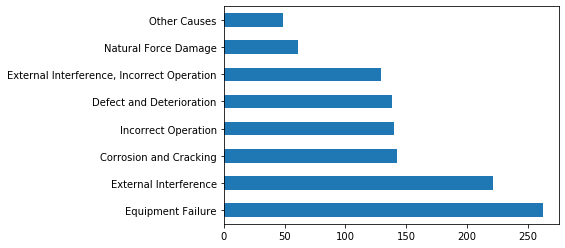

In [127]:
frequance_count[frequance_count>frequance_count.mean()].plot.barh()

Отож, якщо брати до уваги проблеми,  котрі підпадають під певну класифікацію, можна побачити, що найбільш частими є 
* Вихід з ладу обладнання 
* Чиники зовнішнього впливу
* Корозія та поломка 
* Неправильна експлоатація 
* Дефекти та несправності 
* Зовнішні подразники та неправильна експлотація 
* Пошкодження чиниками навколишнього середовища 

### Проаналізуємо причини найбільш популярного інцеденту, пов'язано з несправністю обладнання

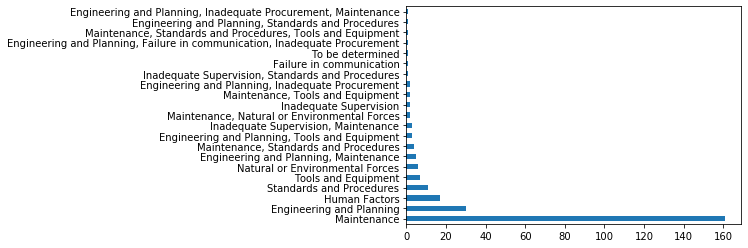

In [137]:
reasons = input[input['What Happened']=='Equipment Failure']
reasons['Why It Happened'].value_counts().plot.barh()

### Висновок: 

З проведеного дослідження видно,  що найбільша частина інцедентів сталась під час планових ремонтних робіт,  при тому, що інцедентів,  котрі трапились з людського чиника значно менше(близько 12.5 відсотків від кількості ремонтних робіт). З цього можна зробити висновок, що процеси проведення робіт з підтримки обладнання потребуют удосконалення та переробки, що дозволить скоротити кількість аварій в газотранспортній системі. 